In [2]:
# Links:

# https://keras.io/api/datasets/cifar100/
# https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [4]:
cifar100 = tf.keras.datasets.cifar100

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode="coarse")

169001437/169001437 [==============================] - 3s 0us/step


In [15]:
class_names = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables',
               'household_electrical_devices', 'household_furniture', 'insects',
               'large_carnivores', 'large_man-made_outdoor_things',
               'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores',
               'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles',
               'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']

In [16]:
train_images.shape

(50000, 32, 32, 3)

In [17]:
len(train_labels)

50000

In [18]:
train_labels

array([11, 15,  4, ...,  8,  7,  1])

In [19]:
test_images.shape

(10000, 32, 32, 3)

In [20]:
len(test_images)

10000

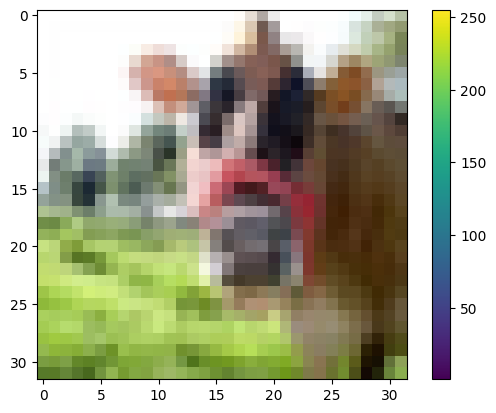

In [21]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
train_labels = np.asarray(train_labels).reshape(-1)

train_labels

array([11, 15,  4, ...,  8,  7,  1])

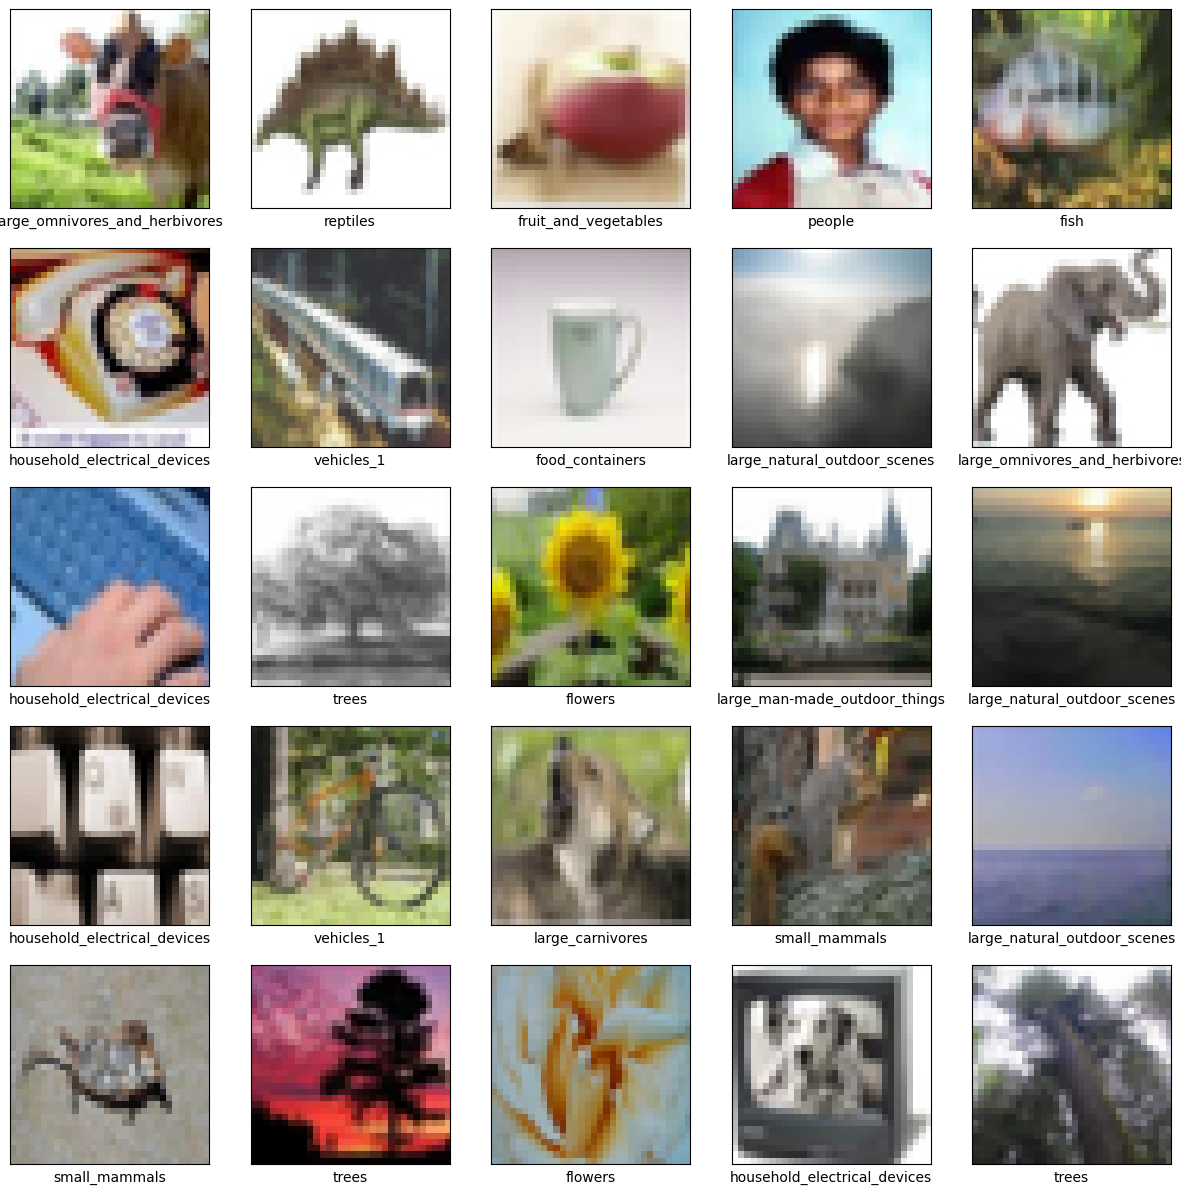

In [23]:
plt.figure(figsize=(15, 15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap='viridis')
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
# build the model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=120)

Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 15s 6ms/step - loss: 2.5783 - accuracy: 0.2424
Epoch 2/120
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1184 - accuracy: 0.3486
Epoch 3/120
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9536 - accuracy: 0.3943
Epoch 4/120
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8481 - accuracy: 0.4255
Epoch 5/120
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7716 - accuracy: 0.4475
Epoch 6/120
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6951 - accuracy: 0.4711
Epoch 7/120
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6347 - accuracy: 0.4863
Epoch 8/120
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5911 - accuracy: 0.4968
Epoch 9/120
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5479 - accuracy: 0.5129
Epoch 10/120
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5105

In [27]:
len(class_names)

20

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\Test accuracy:', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 1s - loss: 1.8084 - accuracy: 0.5102 - 915ms/epoch - 3ms/step
\Test accuracy: 0.510200023651123


In [31]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [33]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [34]:
predictions[0]

array([0.0173343 , 0.00999934, 0.00988791, 0.00988652, 0.00989779,
       0.00997428, 0.00994426, 0.01001028, 0.01042761, 0.01093732,
       0.0099452 , 0.01002205, 0.01004562, 0.01038895, 0.0103038 ,
       0.01028658, 0.01011176, 0.00991589, 0.01006094, 0.01013122,
       0.00988111, 0.00988111, 0.00988111, 0.00988111, 0.00988111,
       0.00988111, 0.00988111, 0.00988111, 0.00988111, 0.00988111,
       0.00988111, 0.00988111, 0.00988111, 0.00988111, 0.00988111,
       0.00988111, 0.00988111, 0.00988111, 0.00988111, 0.00988111,
       0.00988111, 0.00988111, 0.00988111, 0.00988111, 0.00988111,
       0.00988111, 0.00988111, 0.00988111, 0.00988111, 0.00988111,
       0.00988111, 0.00988111, 0.00988111, 0.00988111, 0.00988111,
       0.00988111, 0.00988111, 0.00988111, 0.00988111, 0.00988111,
       0.00988111, 0.00988111, 0.00988111, 0.00988111, 0.00988111,
       0.00988111, 0.00988111, 0.00988111, 0.00988111, 0.00988111,
       0.00988111, 0.00988111, 0.00988111, 0.00988111, 0.00988

In [35]:
np.argmax(predictions[0])

0

In [36]:
test_labels[0]

array([10])